In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('economic_index.csv')
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [4]:
# drop unnecessary columns
df.drop(columns = ['Unnamed: 0','year','month'],axis=1,inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [44]:
# do some vis

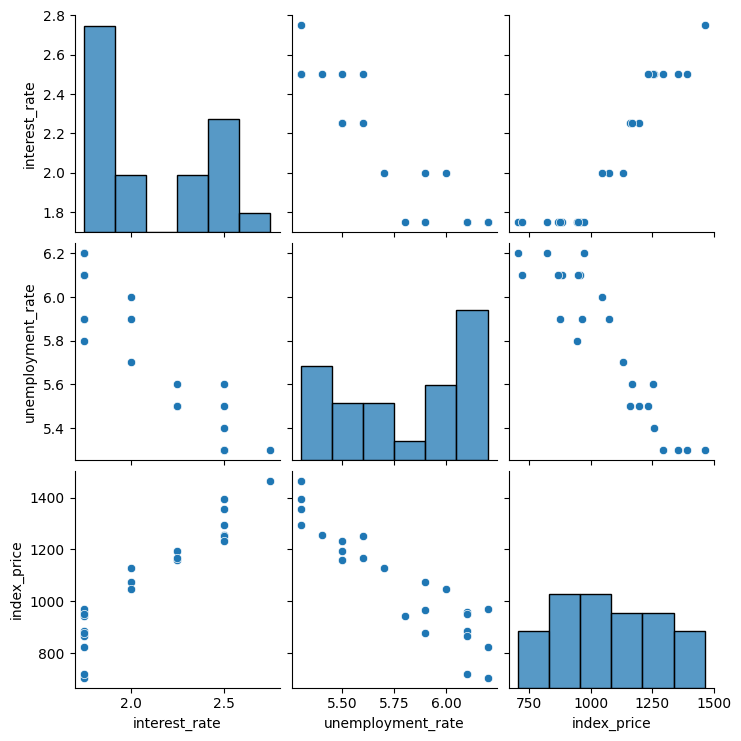

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate ')

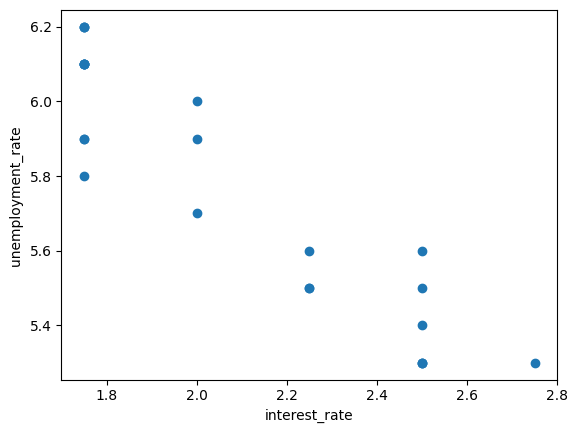

In [10]:
# visualise data point more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate ')

In [11]:
# independent and dependent features
# X = df[['interest_rate','unemployment_rate']]
X = df.iloc[:,:-1]
# y = df['index_price']
y= df.iloc[:,-1]

In [13]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [15]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

<Axes: xlabel='interest_rate', ylabel='index_price'>

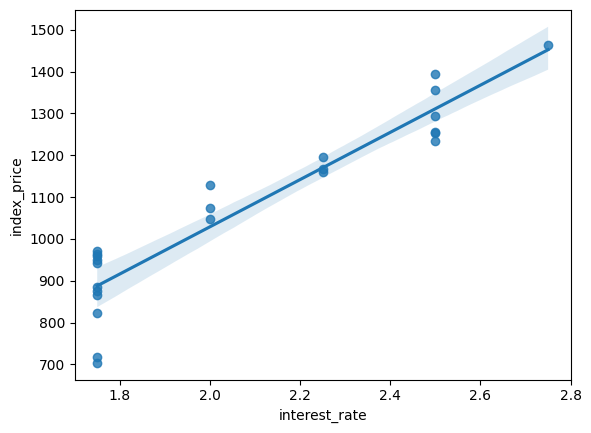

In [16]:
# more plots

#  #it Plots data and a linear regression fit

sns.regplot(x=df['interest_rate'], y=df['index_price'])
# sns.regplot(x='interest_rate', y='index_price', data=df) # both are ok 



<Axes: xlabel='index_price', ylabel='unemployment_rate'>

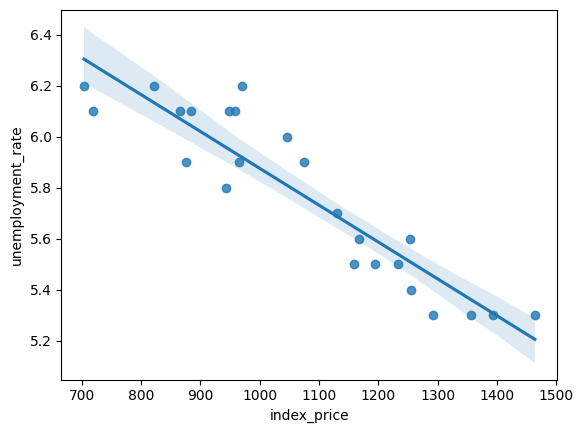

In [19]:
sns.regplot(x='index_price', y='unemployment_rate', data=df)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

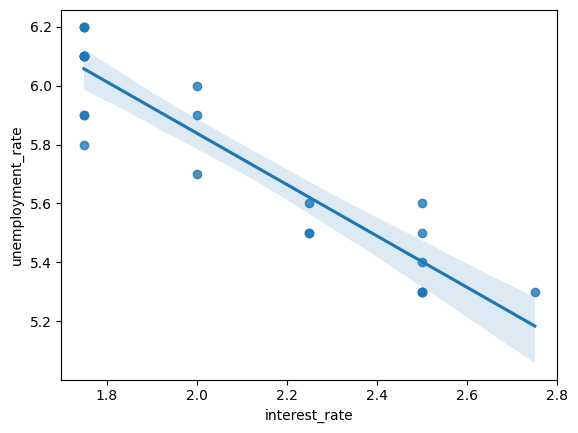

In [20]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)


In [21]:
# train test split
from sklearn.model_selection import train_test_split


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
#Standerdisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [24]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [25]:
X_test = scaler.transform(X_test)

X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regression  = LinearRegression(n_jobs=-1)

In [28]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [29]:
from sklearn.model_selection import cross_val_score

 cross_val_score(estimator,x,y,scoring,cv)<br>
estimator -> model , xtrain,ytrain <br>

scoring -> Why “negative” MSE?
Because cross_val_score() in sklearn always expects higher scores to be better.

Higher score → better model

But MSE (Mean Squared Error) is a loss → lower is better<br>

cv = 5 mtlb ek bar 1 test 4 train fir 2 test ,3 train and soon



In [31]:
# cross validation -> just an extra step to avoid overfiting 

validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv =3)

In [32]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [33]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [34]:
print('cofficient/slope: ',regression.coef_)
print('INTERCEPT: ',regression.intercept_)

cofficient/slope:  [  88.27275507 -116.25716066]
INTERCEPT:  1053.4444444444443


In [35]:
y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [37]:
# performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [38]:
mse = mean_squared_error(y_test,y_pred)  # might  be lot of outliers
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


5793.762887712569
59.935781523235484
76.11677139574805


In [39]:
from sklearn.metrics import r2_score

In [40]:
score = r2_score(y_test,y_pred)
print(score)


0.8278978091457145


In [48]:
X_test.shape[1]

2

In [71]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7131630152428576

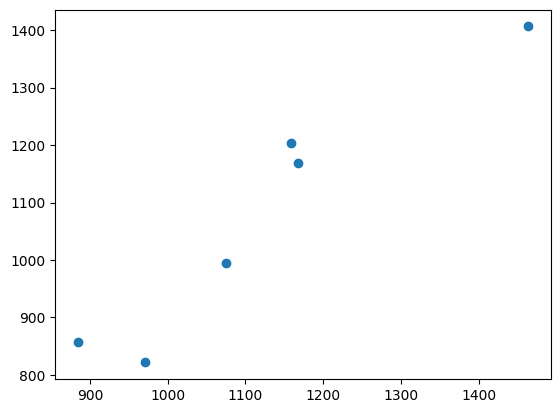

In [49]:
#assumptions
plt.scatter(y_test,y_pred)

In [51]:
residuals = y_test-y_pred
print(residuals)


8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


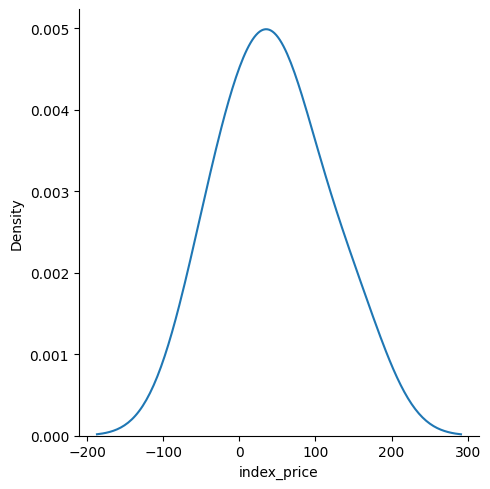

In [52]:
sns.displot(residuals,kind='kde')


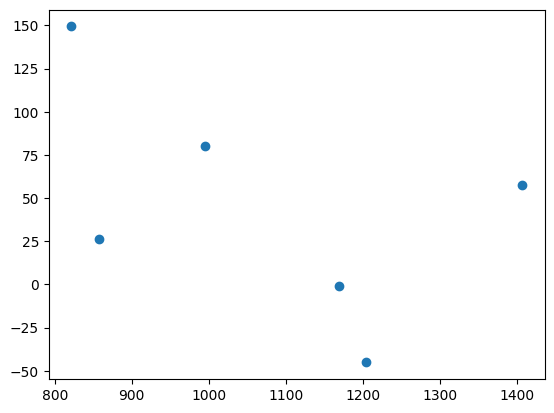

In [53]:
#scatter plot w.r.t prediction and residuals
plt.scatter(y_pred,residuals)

# here its is uniform dist . so there is no problem 
# if some pattern comes then there is a problem


In [54]:
# using ols
import statsmodels.api as sm

In [55]:
model = sm.OLS(y_train,X_train).fit()

In [56]:
prediction = model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [57]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 03 Jun 2025   Prob (F-statistic):                       0.754
Time:                        18:12:17   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/navneetsharma/Desktop/Data Science/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
